Fatima Abdoun, Serena Bou Chaaya, Valentine Wien, Victoire Ollari 

In [1]:
import matplotlib.pylab as plt 
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

# 1. Cost functions

Lets focus on linear regression of the form 

$\mathbf{y} \approx f(\mathbf{X}) = \mathbf{X}\mathbf{w_1} + \mathbf{w_0}.$


#### 1.1 What are the rows of $\mathbf{X}$?

* Each **row** of X corresponds to **one data point (observation, sample)**.
* That is, row i contains the feature values of the i-th example.
* If there are n samples, X will have n rows.

#### 1.2 What are the columns of $\mathbf{X}$?

* Each column of X corresponds to one feature/variable across all data points.
* That is, column j contains the values of the j-th feature for every observation.
* If there are m features, X will have m columns.

Often, we write the equation above as

$\mathbf{y} \approx \mathbf{\tilde{X}}\mathbf{w}$

#### 1.3 How does $\mathbf{\tilde{X}}$ look like in this case (i.e., how does the shape of the matrix change compared to $\mathbf{X}$)?

We start from:

$$
y \approx X w_1 + w_0
$$


To rewrite this in the compact form

$$
y \approx \tilde{X} W
$$

we **augment $X$** with an additional column of ones.

That is:

$$
\tilde{X} =
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \cdots & x_{1,d} \\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2,d} \\
\vdots & \vdots & \vdots & & \vdots \\
1 & x_{n,1} & x_{n,2} & \cdots & x_{n,d}
\end{bmatrix}
$$

and

$$
W =
\begin{bmatrix}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_d
\end{bmatrix}
$$
This can be proved : 
We start with the augmented forms:

$$
\tilde{X} = \begin{bmatrix} \mathbf{1} & X \end{bmatrix}, 
\qquad
W = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix},
$$

where  
- $\mathbf{1} \in \mathbb{R}^{n \times 1}$ is a column of ones,  
- $X \in \mathbb{R}^{n \times d}$ is the feature matrix,  
- $w_0 \in \mathbb{R}$ is the scalar bias,  
- $w_1 \in \mathbb{R}^{d \times 1}$ is the weight vector.  


***Matrix multiplication***:

$$
\tilde{X} W 
= 
\begin{bmatrix} \mathbf{1} & X \end{bmatrix}
\begin{bmatrix} w_0 \\ w_1 \end{bmatrix}
= \mathbf{1} w_0 + X w_1
$$



***Interpretation***:

- $\mathbf{1} w_0 = w_0 \mathbf{1}$ is just an $n$-vector with every entry equal to $w_0$.  
- So:

$$
\tilde{X} W = X w_1 + w_0 \mathbf{1}.
$$


***Component-wise (for sample $i$)***:

$$
(\tilde{X} W)_i = w_0 \cdot 1 + \sum_{j=1}^{d} x_{ij} w_{1,j}
= w_0 + (X w_1)_i
$$

This is exactly the original expression:

$$
X w_1 + w_0.
$$

- Original $X$:
  - Shape: $(n \times d)$  
  - $n =$ number of samples (rows)  
  - $d =$ number of features (columns)  

- Augmented $\tilde{X}$:
  - Shape: $(n \times (d+1))$  
  - Same number of rows (still one per sample).  
  - One extra column (the bias column of ones).  

- Weight vector $W$:
  - Shape: $((d+1) \times 1)$, holding both intercept $w_0$ and feature weights.  

- $\tilde{X}$ is the original design matrix $X$ **with an extra first column of ones**.  
- Its shape changes from $(n \times d)$ to $(n \times (d+1))$.  


For machine learning, we need a cost function. Two common choices are the mean-squared error (MSE, $\mathcal{L}_2$), and the mean-absolute error (MAE, $\mathcal{L}_1$)

\begin{align}
    \mathcal{L}_2 &=& \frac{1}{N} \sum_{i=1}^N \left(y_i - f(x_i) \right)^2 \\
    \mathcal{L}_1 &=& \frac{1}{N} \sum_{i=1}^N \left|y_i - f(x_i) \right| 
\end{align}

#### 1.4 In the Jupyter notebook, write a Python function that computes these two cost functions given an error term $\boldsymbol{\epsilon} = \mathbf{y} - \mathbf{\tilde{X}}\mathbf{w}$

In [2]:
def mean_squared_error(error_vector):
    mean_squared_error = np.mean(error_vector**2)
    return mean_squared_error

In [4]:
mean_squared_error(np.array([0,0,0]))

0.0

In [3]:
def mean_absolute_error(error_vector):
    mean_absolute_error = np.mean(np.abs(error_vector))
    return mean_absolute_error

In [5]:
mean_absolute_error([1,1,1])

1.0

Your code should run as follows

```python
mean_squared_error(np.array([0,0,0]))
> returns 0
```

```python
mean_squared_error(np.array([1,1,1]))
> returns 1
```

#### 1.5 What is the shape of these cost functions as a function of the error

In [ ]:
x_axis = np.linspace(-10,10,100) 
y_mae = [mean_absolute_error(x) for x in x_axis]
y_mse = [mean_squared_error(x) for x in x_axis]

Text(0, 0.5, 'cost function')

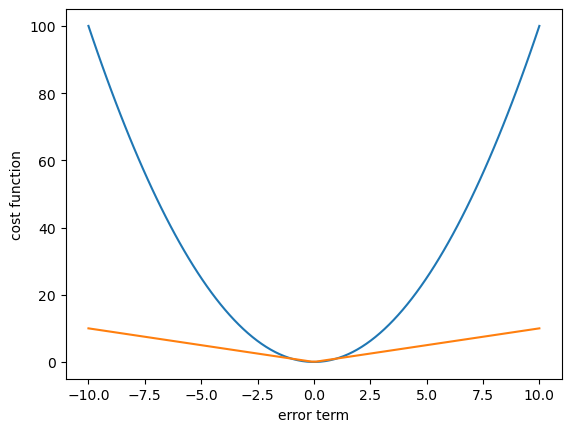

In [7]:
plt.plot(x_axis, y_mse, label='MSE')
plt.plot(x_axis, y_mae, label='MAE')
plt.xlabel('error term')
plt.ylabel('cost function')

***Cost Functions in Linear Regression***

In linear regression, we use a *cost function* to measure how far the model’s predictions are from the true values. Two common choices are the *Mean Squared Error (MSE)* and the *Mean Absolute Error (MAE)*.

The plot above shows the cost functions evaluated on a range of possible error values from (-10) to (10):

* *Blue curve = MSE ($x^2$)*
* *Orange curve = MAE ($|x|$)*

***Interpretation of the curves***

* **Blue curve (MSE):**

  * A parabola opening upwards.
  * Cost increases *quadratically* as the error grows.
  * This means *large errors are penalized much more heavily* than small errors.

* **Orange curve (MAE):**

  * A straight “V”-shaped line.
  * Cost increases *linearly* with the error.
  * This means *all errors are treated proportionally*, making MAE more robust to outliers.

***Summary***

* The *blue parabola* represents the *Mean Squared Error (MSE)*.
* The *orange V-shape* represents the *Mean Absolute Error (MAE)*.
* MSE punishes large errors more severely, while MAE gives a fairer weight to all errors.



#### 1.6  Are both loss functions differentiable for all $\boldsymbol{\epsilon}$? What implications does this have for gradient based optimization like gradient descent?

***Differentiability of the two losses***

* *MSE (Mean Squared Error):*

$$
\text{MSE}(\epsilon) = \frac{1}{N}\sum_{i=1}^N \epsilon_i^2
$$

* Differentiable everywhere (smooth parabola).
* Derivative:
  $$
  \frac{\partial \text{MSE}}{\partial \epsilon_i} = \frac{2}{N}\epsilon_i
  $$

This makes MSE very friendly for gradient-based optimization methods.

* *MAE (Mean Absolute Error):*

$$
\text{MAE}(\epsilon) = \frac{1}{N}\sum_{i=1}^N |\epsilon_i|
$$

* Differentiable everywhere *except at** $\epsilon_i = 0$ (the “corner” of the V).
* Gradient:

$$
\frac{\partial \text{MAE}}{\partial \epsilon_i} = \frac{1}{N}, \quad \epsilon_i > 0
$$

$$
\frac{\partial \text{MAE}}{\partial \epsilon_i} = -\frac{1}{N}, \quad \epsilon_i < 0
$$

$$
\frac{\partial \text{MAE}}{\partial \epsilon_i} \text{ is undefined } , \quad \epsilon_i = 0
$$


⚠️ At $\epsilon_i = 0$, the gradient is not defined. 

***1. Optimization in machine learning***

When we train a model (like linear regression or neural networks), we want to find the *best parameters* (weights (w)) that minimize a *loss function* (e.g., MSE, MAE).

* Optimization = process of finding the minimum of the loss function.
* The “landscape” of the loss function can be visualized like a surface or curve.

***2. What is the **gradient**?***

* The *gradient* is a vector of partial derivatives of the loss function with respect to the parameters.
* Intuitively: it points in the direction of *steepest increase*.
* If we want to minimize, we go in the *opposite direction* of the gradient.


***3. Why gradients matter***

* If the loss is smooth (like **MSE**), gradients are well-defined everywhere → optimization is straightforward.
* If the loss has corners (like **MAE**), gradients may not exist everywhere → we use *subgradients*, and optimization may be slower or trickier.

* **MSE:**

  * Smooth and differentiable → gradient descent has a clear direction everywhere.
  * Leads to stable and efficient optimization.

* **MAE:**

  * Non-differentiable at $\epsilon = 0$.
  * Gradient descent still works, but requires **subgradient methods** or special handling.
  * Convergence can be slower or less stable.

* **MSE is differentiable everywhere**, so gradient descent works smoothly.
* **MAE is not differentiable at zero**, which complicates gradient-based optimization.
  In practice, optimizers can still handle this using subgradients, but training may be less stable and slower compared to MSE.

#### 1. Which loss function is more sensitive to outliers and why?

1. **MSE squares the error terms**:
   $$
   \text{MSE} = \frac{1}{N}\sum_{i=1}^N \epsilon_i^2
   $$

   * If one data point has a very large error (an outlier), squaring it makes it disproportionately larger than the rest.
   * Example:

     * Normal error = 2 → squared = 4
     * Outlier error = 20 → squared = 400 
   * That one outlier can dominate the cost.

2. **MAE grows linearly with error**:
   $$
   \text{MAE} = \frac{1}{N}\sum_{i=1}^N |\epsilon_i|
   $$

   * Outliers only contribute proportionally to their magnitude.
   * So the influence of a large error is not exaggerated compared to small errors.

***Summary***

* **MSE** → **more sensitive** to outliers, because squaring amplifies large errors.
* **MAE** → more **robust** to outliers, since it treats all errors linearly.


# 2. Regularization

Assume that the columns of $\mathbf{X}$ are linearly independent.
As a refresher of linear algebra, recall when the linear system $\mathbf{X}\mathbf{w} = \mathbf{y}$ has

#### 2.1 One unique solution

__< Your answer >__

#### 2.2 No solution

__< Your answer >__

#### 2.3 An infinite number of solutions

__< Your answer >__

#### 2.4 Give a geometrical interpretation of the matrix Rank (10 bonus point if you use the Manim package)

__< Your answer >__

#### 2.5 In general, why can't we solve the linear equation using $\mathbf{y} = \tilde{\mathbf{X}}^{-1}\textbf{w}$? (1 point)

__< Your answer >__

#### 2.6 Differentiate above formula step by step and show what will we have?

__< Your answer >__

#### 2.7 if we want $\| y - \tilde{X} w \|_2^2$ to be minimum, what should the derivative be equal to?

__< Your answer >__

#### 2.8 What is the Hat matrix and what does its diagonal values correspond to?

__< Your answer >__

#### 2.9 What is Willson’s plot and how does it help in outlier detection?

__< Your answer >__

#### 2.10 What happens if some columns are linearly dependent? What is the connection to feature selection?

__< Your answer >__

#### 2.11 What will be the new cost function after adding the regularization term?

__< Your answer >__

#### 2.12 What will be the new 𝑤 when we differentiate the new cost function and set it to zero.

__< Your answer >__

#### 2.13 Prove that the part of Hat matrix where we want to take the inverse from is always reversible after we introduce the regularization term.

__< Your answer >__

#### 2.14  What is the shape of the parabola as a function of $a$?

In [14]:
def parabola(x, a = 1): 
    return a * x ** 2

In [17]:
x_axis_parabola = np.linspace(-10, 10, 100)

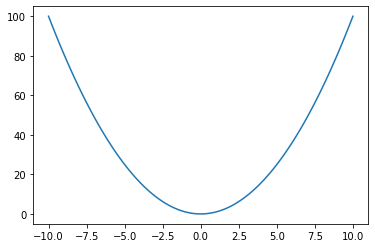

In [18]:
plt.plot(x_axis_parabola, parabola(x_axis_parabola))

__< Your answer >__

#### 2.15 Plot the approximation to the function for different order polynomials ($N \in \{1, 2, 16\}$) and with different regularization strength ($\lambda \in \{0, 10^{-3}, 10^{-2}, 1\}$). What do you observe 

In [22]:
def true_function(X):
    return np.cos(1.5 * np.pi * X)

In [26]:
X_test = np.linspace(0, 1, 100) # some grid for us on the x axis

In [48]:
n_samples = 10 # the number of points we will sample from true_function
degrees = [1, 2, 16] # the polynomial degrees we will test

X = np.sort(np.random.rand(n_samples))
y = true_function(X) + np.random.randn(n_samples) * 0.1 # add some scaled random noise

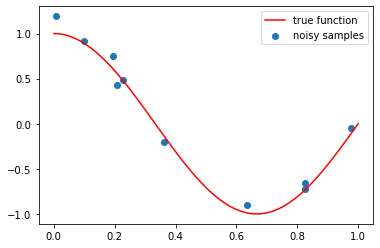

In [49]:
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

The following code will fit a polynomial regression, you need to fill the degree

In [ ]:
polynomial_features = PolynomialFeatures(degree=#FILLEME,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

To plot the result, you can use the following code

In [ ]:
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="model of degree ")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

Next, we can investigate the effect of the regularization parameter $\lambda$ (function parameter `alpha`), For this, you can use the following code 

In [ ]:
polynomial_features = PolynomialFeatures(degree=#fillme,
                                             include_bias=False)
ridge_regression = Ridge(alpha=#fillme)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)


For plotting you can reuse the following code

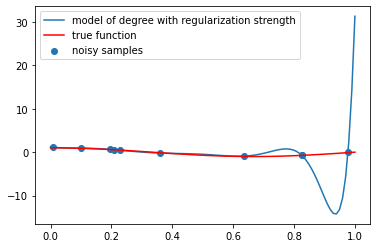

In [53]:
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

#### 2.16 What do you observe if you change the number of samples from the function?

__< Your answer >__

#### 2.17 Why do we need a test set in machine learning?

__< Your answer >__

#### 2.18 If we need to optimize hyperparameters, do we use the test set to select the best hyperparameters? (1 point)

__< Your answer >__